**Introduction to Linear Algebra:**

- Core of modern applied mathematics.
- Basis for numerical analysis, data science, engineering, and more.
- Chapter focus: **Gaussian Elimination**.
- Applications: Solving linear systems with unique or multiple solutions.

**Gaussian Elimination Overview**

- Systematic algorithm to solve linear systems.
- Reduces a system to triangular form.
- Fundamental operations:
 - Add a multiple of one equation to another.
- Maintains equivalent solutions.

**Solve the system of equations**:

x + 2y + z = 2,

2x + 6y + z = 7,

x + y + 4z = 3.

- Step 1: Eliminate x from equations 2 and 3.
- Step 2: Reduce to triangular form.

**Solve triangular system:**

x + 2y + z = 2,

2y − z = 3,

5/2z = 5/2.

**Solution: z = 1, y = 2, x = −3.**

In [1]:
import numpy as np
def gaussian_elimination(A, b):
    """
    Solves Ax = b using Gaussian elimination and back substitution.
    A : coefficient matrix (n x n)
    b : right-hand side vector (n)
    """
    n = len(b)
    # Augmented matrix [A|b]
    Ab = np.hstack([A.astype(float), b.reshape(-1,1).astype(float)])

    # Forward elimination (Gaussian elimination)
    for i in range(n):
        # Pivoting: make sure Ab[i,i] is not zero
        if Ab[i, i] == 0:
            for j in range(i+1, n):
                if Ab[j, i] != 0:
                    Ab[[i, j]] = Ab[[j, i]]  # swap rows
                    break
        
        # Make leading coefficient = 1
        Ab[i] = Ab[i] / Ab[i, i]
        
        # Eliminate below
        for j in range(i+1, n):
            Ab[j] = Ab[j] - Ab[j, i] * Ab[i]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])
    
    return x

# Get input from user
n = int(input("Number of equations (n): "))

print("Enter matrix A row by row (numbers separated by space):")
A = []
for i in range(n):
    row = list(map(float, input(f"Row {i+1}: ").split()))
    A.append(row)
A = np.array(A)

print("Enter vector b (numbers separated by space):")
b = np.array(list(map(float, input().split())))

solution = gaussian_elimination(A, b)
print("Solution of the system: ", solution)


Number of equations (n): 3
Enter matrix A row by row (numbers separated by space):
Row 1: 1 2 1
Row 2: 2 6 1
Row 3: 1 1 4
Enter vector b (numbers separated by space):
2 7 3
Solution of the system:  [-3.  2.  1.]


In [2]:
# Example system:
# x + 2y + z = 2
# 2x + 6y + z = 7
# x + y + 4z = 3
A = np.array([[1, 2, 1],
              [2, 6, 1],
              [1, 1, 4]])
b = np.array([2, 7, 3])

solution = gaussian_elimination(A, b)

**Cheat sheet**

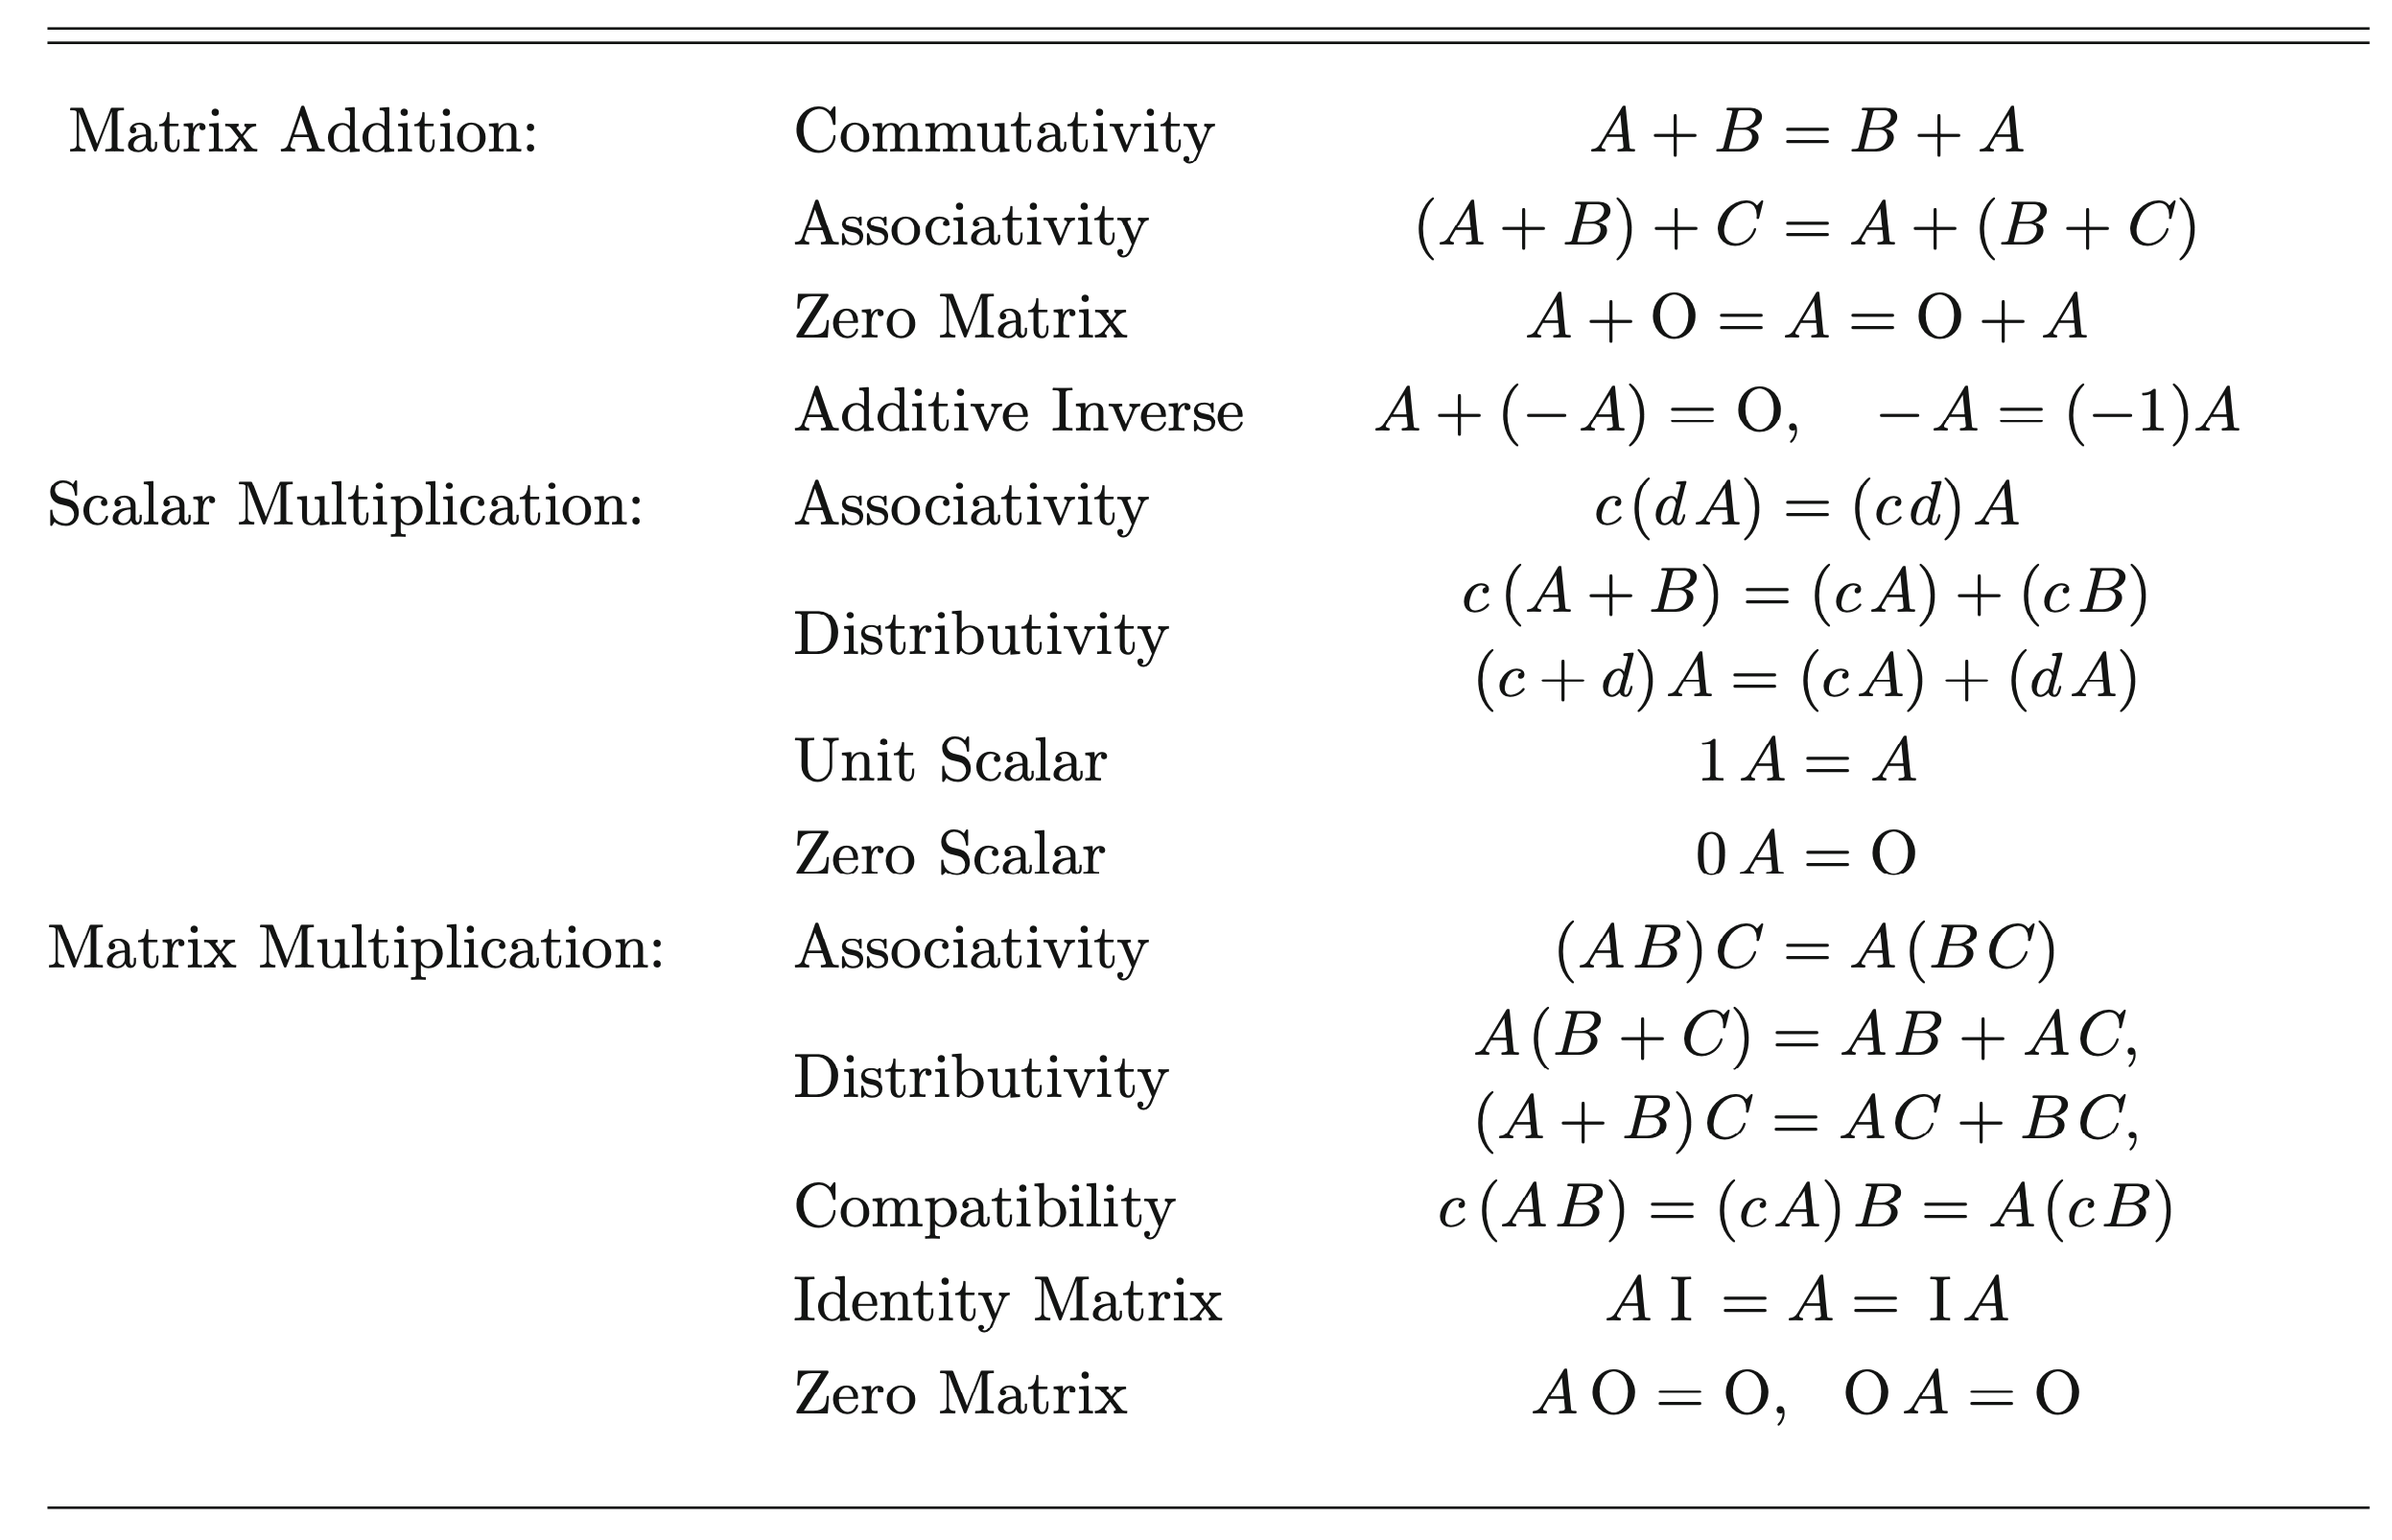

Conclusion :
- Gaussian elimination is a fundamental tool for solving linear systems.
- Limitations exist in terms of numerical stability, scalability, and efficiency for large or complex systems.
- Alternative methods like **LU decomposition**, iterative solvers, and modern computational tools can address these challenges.

You can now try solving **your own systems** by changing `A` and `b` in the code above.
